### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


A detailed examination of the dataset structure and missing values confirmed that the Mall Customers data was fully intact, with no null entries across any of the features. This completeness ensured that subsequent analysis and modeling steps proceeded without the need for data cleaning, providing a robust basis for accurate customer segmentation.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Gender Distribution Overview

The dataset revealed a higher number of female customers compared to male customers. Recognizing this difference was valuable for shaping targeted marketing efforts and enhancing the understanding of the mall’s customer base.

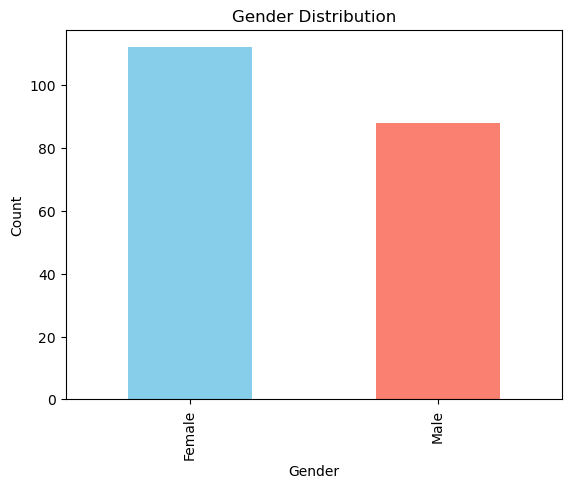

In [5]:
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

### Spending Score by Gender

The boxplot indicated that both male and female customers exhibited a wide range of spending scores, with similar medians and overall distributions. This finding suggested that spending habits were broadly comparable across genders in this dataset.

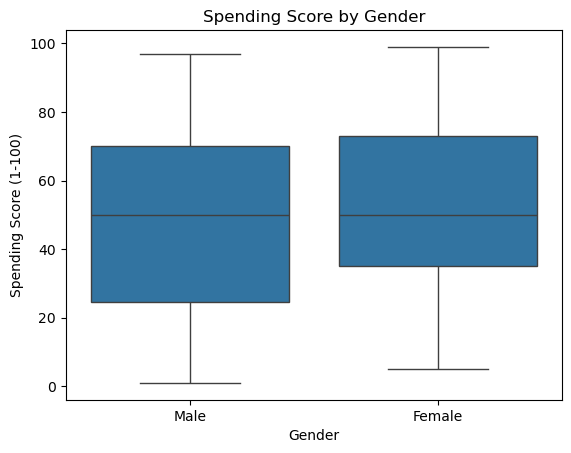

In [6]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title("Spending Score by Gender")
plt.show()

### Customer Age and Income Distributions

The age distribution showed that most mall customers were in their 20s and 30s, with fewer older shoppers. The annual income distribution was fairly balanced, with a slight concentration of customers earning between $40,000 and $80,000 per year. These patterns provided important context for understanding spending behaviors and for segmenting the mall’s customer base.

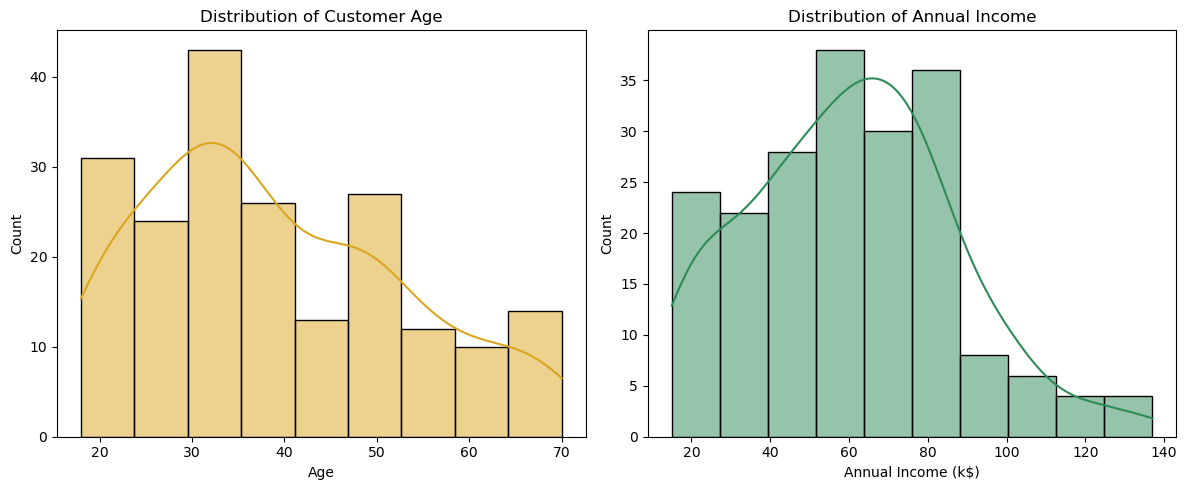

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, color='goldenrod')
plt.title("Distribution of Customer Age")
plt.xlabel("Age")

plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='seagreen')
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")

plt.tight_layout()
plt.show()

Annual income and spending score were selected as the key features for clustering. These features were standardized using the StandardScaler to ensure equal weight and comparable scales during clustering, resulting in more reliable segmentation outcomes.

In [8]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Income vs. Spending Score

The scatter plot illustrated the relationship between customers’ annual income and their spending score. The points displayed distinct groupings, suggesting the presence of different customer segments with varying spending behaviors at different income levels. This visual foundation was valuable for applying clustering algorithms in the subsequent steps.

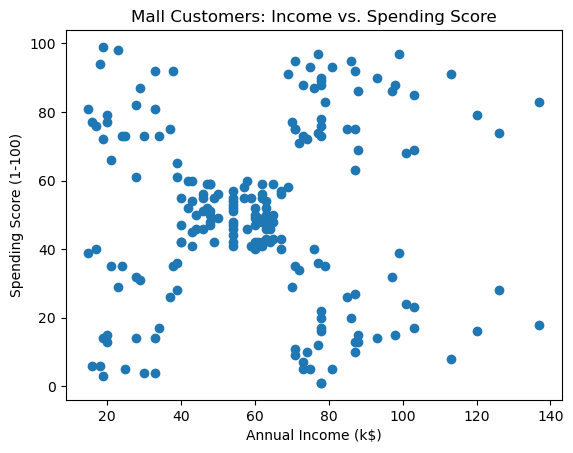

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers: Income vs. Spending Score')
plt.show()

### Income vs. Spending Score by Gender

The scatter plot illustrated annual income and spending score for each customer, colored by gender. Both genders appeared throughout the range of values, indicating that spending and income patterns were similar for male and female customers. This observation reinforced the conclusion that customer segmentation would rely more on income and spending patterns than on gender differences.

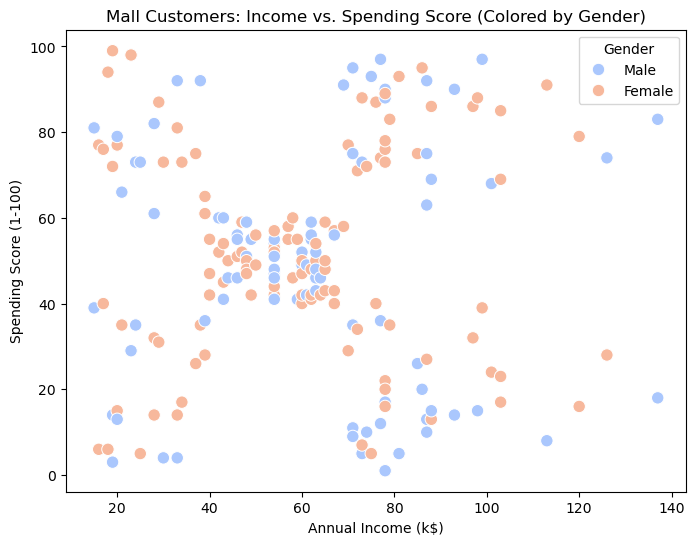

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='coolwarm', s=80)
plt.title('Mall Customers: Income vs. Spending Score (Colored by Gender)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

### Elbow Method for K-Means

The elbow plot showed how the within-cluster sum of squares (WCSS) decreased as the number of clusters increased. The “elbow” point suggested an optimal cluster number, providing guidance for selecting the best value of k in K-Means clustering.

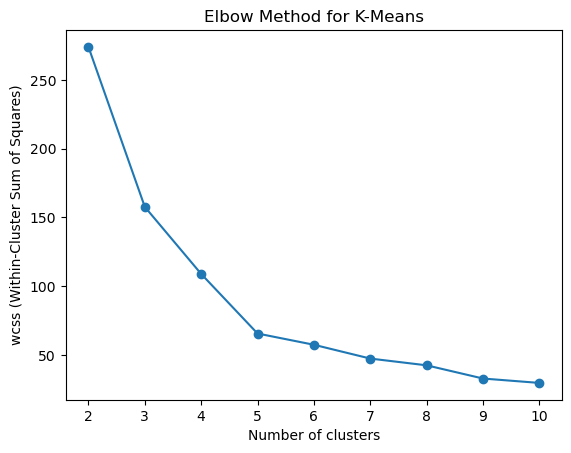

In [12]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('wcss (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for K-Means')
plt.show()


### K-Means Clusters

The scatter plot visualized the results of K-Means clustering with five clusters, using annual income and spending score as features. Each color represented a distinct customer group with similar spending behaviors and income levels, illustrating how K-Means effectively segmented the mall’s customers into meaningful clusters.

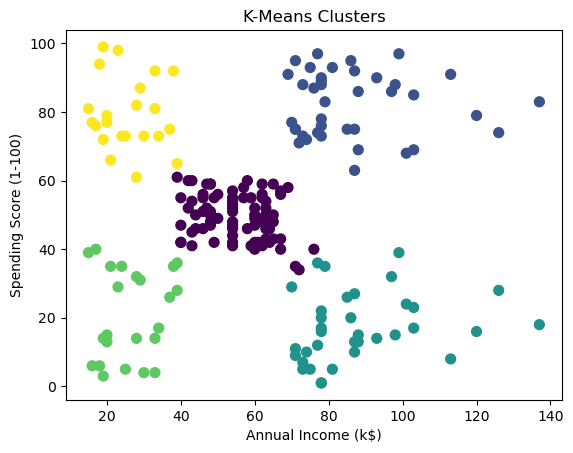

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clusters')
plt.show()

### Cluster Centers Analysis

The table summarized the average annual income and spending score for each K-Means cluster. These values highlighted the distinct characteristics of each customer segment, making it easier to interpret and label the clusters based on their typical income and spending patterns.

In [ ]:
print(df.groupby('KMeans_Cluster')[features].mean())

                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        88.200000               17.114286
3                        26.304348               20.913043
4                        25.727273               79.363636


### Interactive K-Means Clusters

The interactive scatter plot displayed the K-Means clustering results, with each point representing a customer and colored according to its assigned cluster. This visualization allowed for clear identification of distinct customer segments based on annual income and spending score, and enabled deeper exploration of cluster characteristics through interactive features.

In [15]:
df_plot = df.copy()
df_plot['KMeans_Cluster_str'] = df_plot['KMeans_Cluster'].astype(str)

fig = px.scatter(
    df_plot, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    color='KMeans_Cluster_str',
    hover_name='KMeans_Cluster_str',
    title='Mall Customers Clusters (K-Means)'
)
fig.show()

### k-Distance Graph for DBSCAN

The k-distance graph displayed the sorted distances to each point’s 4th nearest neighbor, helping to determine an appropriate value for the epsilon parameter in DBSCAN. The point where the graph shows a sharp increase indicated a suitable threshold for distinguishing clusters from noise.

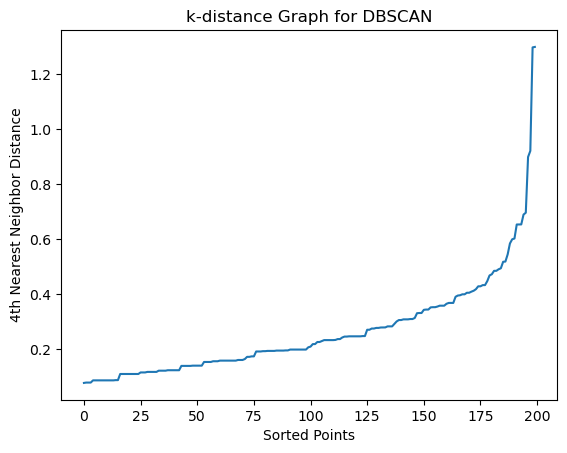

In [16]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:,4])
plt.plot(k_distances)
plt.ylabel("4th Nearest Neighbor Distance")
plt.xlabel("Sorted Points")
plt.title("k-distance Graph for DBSCAN")
plt.show()


### DBSCAN Clusters

The scatter plot visualized the clustering results of the DBSCAN algorithm, with each color representing a distinct cluster and noise points labeled as -1. DBSCAN successfully identified groups of customers with similar income and spending patterns, while also detecting outliers that did not fit well into any cluster.

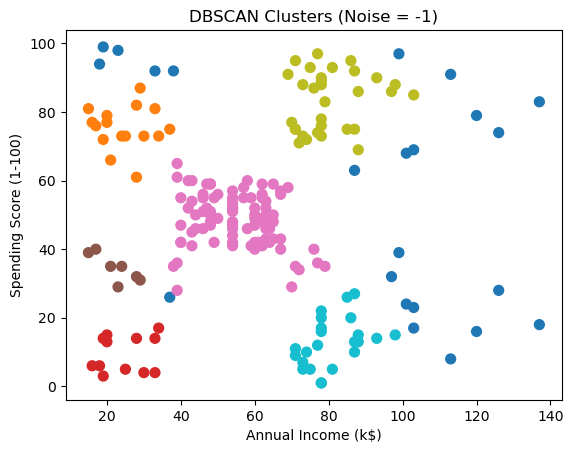

In [20]:
dbscan = DBSCAN(eps=0.35, min_samples=5)  # Tune eps if needed
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='tab10', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clusters (Noise = -1)')
plt.show()


### DBSCAN Cluster Centers Analysis

The table summarized the average annual income and spending score for each DBSCAN cluster, including the noise group labeled as -1. These averages highlighted the distinct characteristics of each cluster and provided insight into the spending patterns and income levels typical for each group identified by DBSCAN.

In [21]:
print(df.groupby('DBSCAN_Cluster')[features].mean())

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       89.260870               57.826087
 0                       24.750000               75.375000
 1                       24.583333                9.583333
 2                       22.428571               34.428571
 3                       55.227273               48.579545
 4                       80.290323               83.193548
 5                       80.956522               12.782609


### Interactive DBSCAN Clusters

The interactive scatter plot visualized the DBSCAN clustering results, with each point colored by its assigned cluster label, including noise points. This plot enabled detailed exploration of customer segments based on annual income and spending score, and allowed for intuitive identification of outliers and cluster structures through interactive features.

In [ ]:
df_plot = df.copy()
df_plot['DBSCAN_Cluster_str'] = df_plot['DBSCAN_Cluster'].astype(str)

fig = px.scatter(
    df_plot,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='DBSCAN_Cluster_str',
    hover_name='DBSCAN_Cluster_str',
    title='Mall Customers Clusters (DBSCAN)',
    size_max=10
)
fig.show()


### Results and Recommendations

By analyzing the data, distinct groups of customers with similar income and spending patterns were identified. This segmentation provides a foundation for more effective marketing, allowing the mall to tailor promotions to each group. Offering personalized deals to top-spending customers and targeted incentives to lower-spending segments is advised to enhance both customer loyalty and overall sales.

### Limitations and Future Work

One limitation of this project is the relatively small dataset and the focus on just a few customer features. Incorporating additional information, such as shopping frequency, product categories could provide more detailed customer profiles and lead to even more effective segmentation. For future work, testing other clustering methods or integrating predictive modeling could offer further insights and strengthen the analysis.
